## Homework 2
Ariadna Jaqueline Cordero 

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

In [50]:
import pandas as pd
data=pd.read_csv(r'C:\Users\ariad\Downloads\archive\housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:>

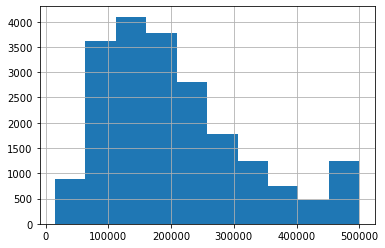

In [6]:
data.median_house_value.hist()

In [7]:
data.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

In [51]:
data=data.loc[:,['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']]

### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [13]:
data.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188


In [15]:
data.population.median()

1166.0

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [52]:
import numpy as np
n=len(data)
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [53]:
nval= int(n*0.2)
ntest= int(n*0.2)
ntrain=n-nval-ntest
(nval,ntest,ntrain)

(4128, 4128, 12384)

In [57]:
df_train=data.iloc[idx[:ntrain]]
df_val=data.iloc[idx[ntrain:nval+ntrain]]
df_test=data.iloc[idx[nval+ntrain:]]
len(df_train),len(df_val),len(df_test)

(12384, 4128, 4128)

In [58]:
y_train=np.log1p(df_train['median_house_value'])
y_test=np.log1p(df_test['median_house_value'])
y_val=np.log1p(df_val['median_house_value'])

In [59]:
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [68]:
base = list(df_train.columns)

In [102]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X_zero(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

def prepare_X_mean(df,mean):
    df_num = df[base]
    df_num = df_num.fillna(mean)
    X = df_num.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [84]:
#Fill with 0
X_train = prepare_X_zero(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [93]:
#Fill with 0
X_val = prepare_X_zero(df_val)
y_pred = w_0 + X_val.dot(w)

print('The RMSE is:  '+str(round(rmse(y_val, y_pred),2)))

The RMSE is:  0.33


In [88]:
#Fill with mean
value_mean=df_train.total_bedrooms.mean()
X_train = prepare_X_mean(df_train,value_mean)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

In [94]:
#Fill with mean
X_val = prepare_X_mean(df_val,value_mean)
y_pred = w_0 + X_val.dot(w)

print('The RMSE is:  '+str(round(rmse(y_val, y_pred),2)))

The RMSE is:  0.33


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

In [92]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [106]:
lista=[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for i in lista:
    X_train = prepare_X_zero(df_train)
    X_val = prepare_X_mean(df_val,value_mean)
    w_0, w = train_linear_regression_reg(X_train, y_train,r=i)
    y_pred = w_0 + X_val.dot(w)
    print('The RMSE for r:  '+str(i)+' is:  '+str(round(rmse(y_val, y_pred),2)))

The RMSE for r:  0 is:  0.33
The RMSE for r:  1e-06 is:  0.33
The RMSE for r:  0.0001 is:  0.33
The RMSE for r:  0.001 is:  0.33
The RMSE for r:  0.01 is:  0.33
The RMSE for r:  0.1 is:  0.33
The RMSE for r:  1 is:  0.33
The RMSE for r:  5 is:  0.34
The RMSE for r:  10 is:  0.34


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [107]:
seed_values=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
scores=[]
for i in seed_values:
    n=len(data)
    idx=np.arange(n)
    np.random.seed(i)
    np.random.shuffle(idx)
    df_train=data.iloc[idx[:ntrain]]
    df_val=data.iloc[idx[ntrain:nval+ntrain]]
    df_test=data.iloc[idx[nval+ntrain:]]
    y_train=np.log1p(df_train['median_house_value'])
    y_test=np.log1p(df_test['median_house_value'])
    y_val=np.log1p(df_val['median_house_value'])
    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']
    X_train = prepare_X_zero(df_train)
    X_val = prepare_X_zero(df_val)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    scores.append(round(rmse(y_val, y_pred),2))
round(np.std(scores),3)

0.005

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

In [113]:
n=len(data)
idx=np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
df_train=data.iloc[idx[:ntrain]]
df_val=data.iloc[idx[ntrain:nval+ntrain]]
df_test=data.iloc[idx[nval+ntrain:]]
df_train_val=pd.concat([df_train,df_val])
y_train_val=np.log1p(df_train_val['median_house_value'])
y_test=np.log1p(df_test['median_house_value'])
del df_train_val['median_house_value']
del df_test['median_house_value']
X_train_val = prepare_X_zero(df_train_val)
X_test = prepare_X_zero(df_test)
w_0, w = train_linear_regression(X_train_val, y_train_val)
y_pred = w_0 + X_test.dot(w)
round(rmse(y_test, y_pred),2)

0.35